## Popular Data Science Questions
Questions from StackFlow Data Explorer,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. General information of the data

### 1.1 Missing values check

In [2]:
# Read the file
question_2019 = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])
print(question_2019.head())
print('\nThe null of each column: ')
print(question_2019.isnull().sum())

      Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    <machine-learning><data-mining>            0   
1  <machine-learning><regression><linear-regressi...            0   
2       <python><time-series><forecast><forecasting>            0   
3              <machine-learning><scikit-learn><pca>            1   
4           <dataset><bigdata><data><speech-to-text>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

The null of each column: 
Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCou

Only FavoriteColumn have 7432 out of 8839 null values, roughly 90% is null. It is not adequeate for the analysis. The following shows the values and the counts. Most of the favourite counts is 4, very few questions have favorite counts more than 5.

In [3]:
question_2019['FavoriteCount'].value_counts(dropna=False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
7.0        4
6.0        4
11.0       1
16.0       1
8.0        1
Name: FavoriteCount, dtype: int64

### 1.2 Cleaning data

In [4]:
# Covert Tags column into list with string elements

question_2019['Tags'] = question_2019['Tags'].str.replace('^<|>$',"").str.split('><')

C:\Users\yuanl\AppData\Local\Temp\ipykernel_36696\1674293167.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  question_2019['Tags'] = question_2019['Tags'].str.replace('^<|>$',"").str.split('><')


In [5]:
question_2019['Tags'][0]

['machine-learning', 'data-mining']

### 1.3 Fill the Favorite Count

In [6]:
question_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Only FavoriteCount has null values and the type is float. We can directly fillna.

In [7]:
question_2019.fillna(0, inplace=True)

### 1.4 Find the most popular tag

In [8]:
# Use dataframe for counting, faster than appending

tag_count = {}
for tags in question_2019['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [9]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0:'Count'}, inplace=True)

In [10]:
# Most used 20 tages

tag_count = tag_count.sort_values('Count', ascending=False)
most_used = tag_count.head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [11]:
%%time
# Find the most viewed tags

# Use dataframe for counting, faster than appending
tag_view = {}
question_2019['Tag_view'] = question_2019['Tags'] * question_2019['ViewCount']
for tags in question_2019['Tag_view']:
    for tag in tags:
        if tag in tag_view :
            tag_view[tag] += 1
        else:
            tag_view[tag] = 1

Wall time: 594 ms


In [12]:
# Tag view dataframe
tag_view = pd.DataFrame.from_dict(tag_view, orient='index')
tag_view.rename(columns={0:'Count'}, inplace=True)
tag_view = tag_view.sort_values('Count', ascending=False)

In [13]:
most_viewed = tag_view.head(20)
most_viewed

,Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


In [14]:
%%time
tag_view_count = {}
for index, row in question_2019.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']


Wall time: 192 ms


In [15]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount", ascending=False).head(20)
most_viewed

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


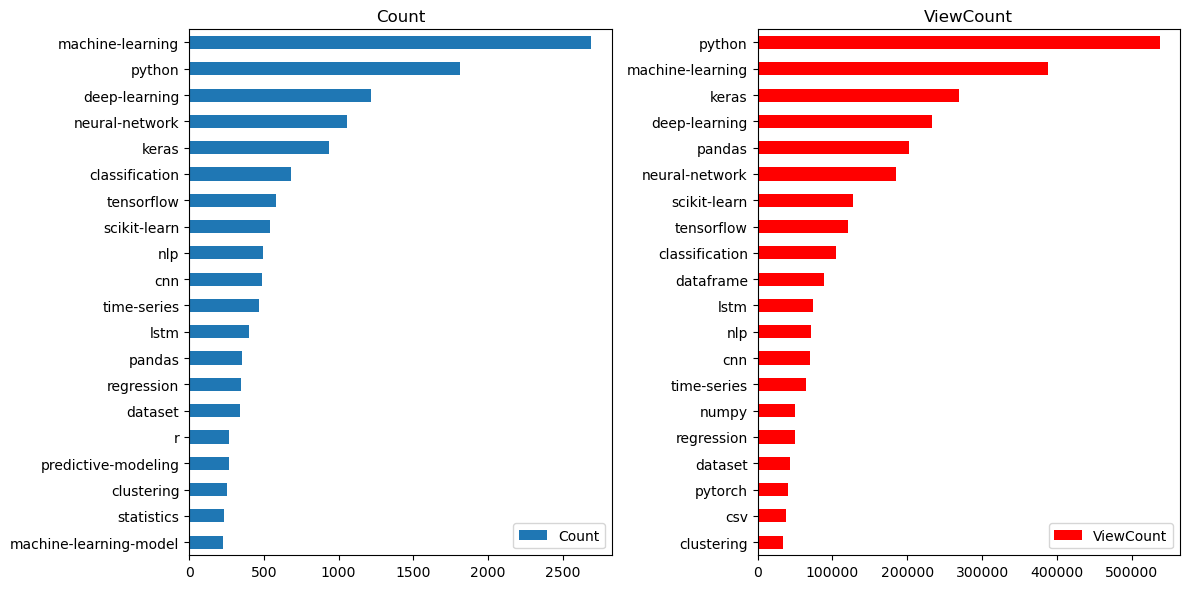

In [16]:
# Data Visulization

fig, axes= plt.subplots(1, 2, figsize=(12,6))
most_used.sort_values('Count').plot.barh(ax=axes[0],  subplots=True)


most_viewed.sort_values('ViewCount').plot.barh(ax=axes[1],subplots=True, color='red')
plt.tight_layout()

### Relationship between tags

In [17]:
# Left on most used

pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [18]:
# Left on most viewed

pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)

,Count,ViewCount
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


### Tags correlation

In [19]:
# All tags
all_tags = list(tag_count.index)

# Create a tag-tag table
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4, 0:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN


In [20]:
# Initiate the table 
associations.fillna(0, inplace=True)

for tag in question_2019['Tags']:
    associations.loc[tag, tag] += 1

In [21]:
associations.iloc[0:4, 0:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,2693,499,429,366
python,499,1814,160,137
deep-learning,429,160,1220,305
neural-network,366,137,305,1055


In [22]:
# Investigate the associations only for most_used tags
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc['time-series', 'r'] = 'background-color: yellow'
    helper_df.loc['r', 'time-series'] = 'background-color: yellow'
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k, k] = 'color: blue'
    return helper_df


    

In [23]:
# Change style of the table

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


<AxesSubplot:>

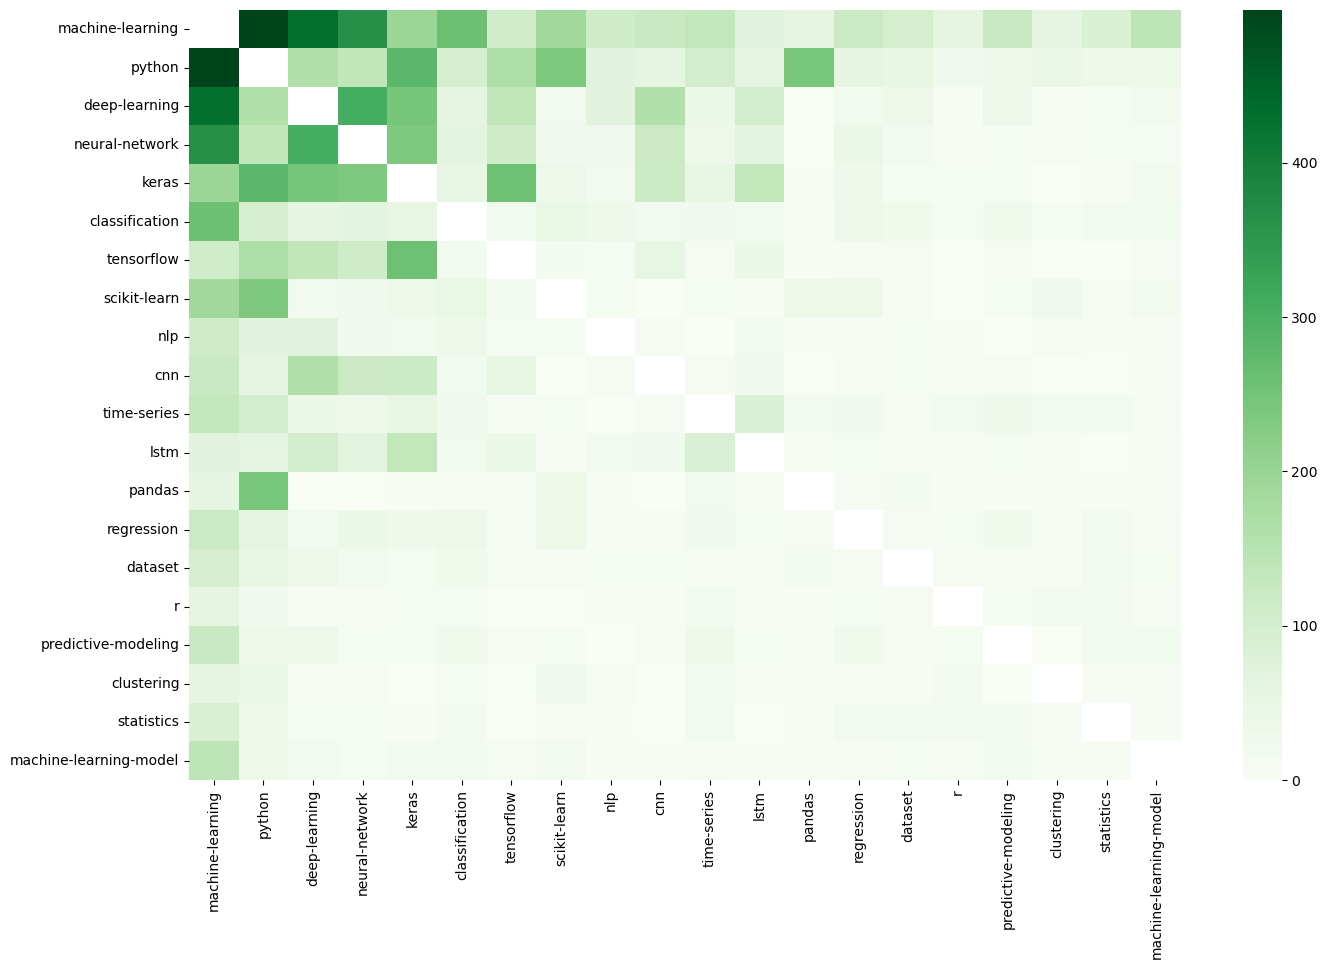

In [24]:
# Create a Heatmap

for k in range(relations_most_used.shape[0]):
    relations_most_used.iloc[k, k] = np.NaN
    
# Heat map
plt.figure(figsize=(16, 10))
sns.heatmap(relations_most_used, cmap='Greens', annot=False)

## Is Deep Learning Just a Fad?

In [56]:
# Read all questions
# quest = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
quest = pd.read_csv('Questions_2023.csv', parse_dates=['CreationDate'])
# clean tags
quest['Tags'] = quest['Tags'].str.replace('^<|>$', '').str.split('><')
quest.head(10)

C:\Users\yuanl\AppData\Local\Temp\ipykernel_36696\10409830.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  quest['Tags'] = quest['Tags'].str.replace('^<|>$', '').str.split('><')


,id,CreationDate,Score,ViewCount,Tags
0,102024,2021-09-13 04:03:32,1,284,"[cnn, convolutional-neural-network, pytorch]"
1,102036,2021-09-13 08:46:22,5,1029,"[deep-learning, neural-network, weight-initial..."
2,102038,2021-09-13 09:54:00,0,43,"[machine-learning, clustering, recommender-sys..."
3,102040,2021-09-13 11:03:28,1,30,"[cost-function, softmax]"
4,102042,2021-09-13 12:56:54,2,173,"[shap, interpretation, marketing]"
5,102043,2021-09-13 13:43:04,1,32,"[deep-learning, generative-models, neural-styl..."
6,102048,2021-09-13 17:44:20,2,19,"[machine-learning, deep-learning, statistics, ..."
7,102050,2021-09-13 18:27:08,2,106,"[machine-learning, decision-trees, xgboost, li..."
8,102053,2021-09-13 20:23:26,1,519,"[python, python-3.x, fuzzy-logic]"
9,71480,2020-03-31 10:05:00,-1,25,"[machine-learning, neural-network, deep-learni..."


In [58]:
# define deep learning
def deep_learning_class(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
# Apply to all questions
quest['DeepLearning'] = quest['Tags'].apply(deep_learning_class) 
quest.head(10)

,id,CreationDate,Score,ViewCount,Tags,DeepLearning
0,102024,2021-09-13 04:03:32,1,284,"[cnn, convolutional-neural-network, pytorch]",1
1,102036,2021-09-13 08:46:22,5,1029,"[deep-learning, neural-network, weight-initial...",1
2,102038,2021-09-13 09:54:00,0,43,"[machine-learning, clustering, recommender-sys...",0
3,102040,2021-09-13 11:03:28,1,30,"[cost-function, softmax]",0
4,102042,2021-09-13 12:56:54,2,173,"[shap, interpretation, marketing]",0
5,102043,2021-09-13 13:43:04,1,32,"[deep-learning, generative-models, neural-styl...",1
6,102048,2021-09-13 17:44:20,2,19,"[machine-learning, deep-learning, statistics, ...",1
7,102050,2021-09-13 18:27:08,2,106,"[machine-learning, decision-trees, xgboost, li...",0
8,102053,2021-09-13 20:23:26,1,519,"[python, python-3.x, fuzzy-logic]",0
9,71480,2020-03-31 10:05:00,-1,25,"[machine-learning, neural-network, deep-learni...",1


In [59]:
# Get the time
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str((datetime.month-1)//3 + 1)
    return "{y}Q{q}".format(y=year, q=quarter)
quest['Quarter'] = quest['CreationDate'].apply(fetch_quarter)
quest.head()

,id,CreationDate,Score,ViewCount,Tags,DeepLearning,Quarter
0,102024,2021-09-13 04:03:32,1,284,"[cnn, convolutional-neural-network, pytorch]",1,21Q3
1,102036,2021-09-13 08:46:22,5,1029,"[deep-learning, neural-network, weight-initial...",1,21Q3
2,102038,2021-09-13 09:54:00,0,43,"[machine-learning, clustering, recommender-sys...",0,21Q3
3,102040,2021-09-13 11:03:28,1,30,"[cost-function, softmax]",0,21Q3
4,102042,2021-09-13 12:56:54,2,173,"[shap, interpretation, marketing]",0,21Q3


In [63]:
# Aggerate the table using quarter

quest_group = quest.groupby('Quarter').sum()[['DeepLearning']].reset_index()
quest_group['TotalTagsCount'] = quest.groupby('Quarter').size().values
quest_group['DeepLearningRate'] = round(quest_group['DeepLearning'] /quest_group['TotalTagsCount'], 2)
quest_group.sort_values('Quarter').tail()
# quest_group.drop(23, inplace=True)
quest_group.drop(37, inplace=True)

In [61]:
# Very nice!!!
quest.groupby('Quarter')['DeepLearning'].agg(['sum', 'size'])

,sum,size
Quarter,,
14Q2,9,157
14Q3,13,188
14Q4,21,214
15Q1,17,188
15Q2,28,284
15Q3,45,310
15Q4,66,379
16Q1,110,510
16Q2,109,510


In [53]:
quest.head()

,id,CreationDate,Score,ViewCount,Tags,DeepLearning,Quarter
0,68180281,2021-06-29 14:02:06,0,89,"[javascript, html, css, flexbox, nav]",0,21Q2
1,68180283,2021-06-29 14:02:14,2,261,"[architecture, domain-driven-design]",0,21Q2
2,68180284,2021-06-29 14:02:26,0,870,"[python, docker, matplotlib, ubuntu]",0,21Q2
3,68180286,2021-06-29 14:02:28,-1,300,"[sql, google-bigquery]",0,21Q2
4,68180288,2021-06-29 14:02:31,1,191,"[python, python-3.x, numpy]",0,21Q2


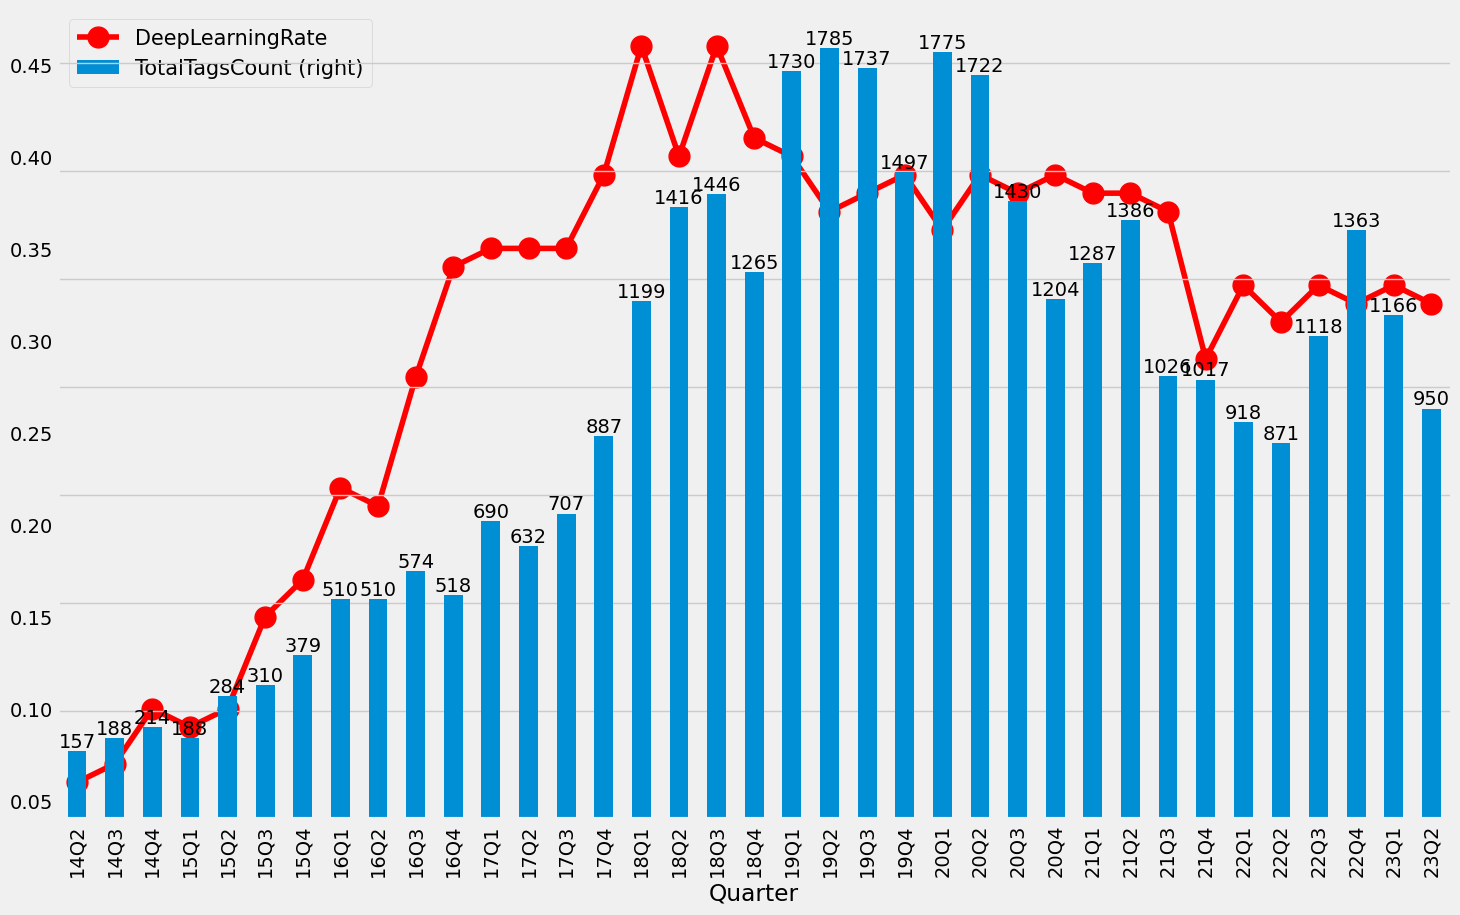

In [64]:
# Plot
plt.style.use('fivethirtyeight')
ax1 = quest_group.plot.line(x='Quarter', linestyle='-', marker='o', markersize=15, color='red', y='DeepLearningRate', grid=False, figsize=(16,10))

ax2 = quest_group.plot.bar(x='Quarter', y='TotalTagsCount', ax=ax1, secondary_y=True, grid=False, figsize=(16,10))

# Enable label
for idx, t in quest_group['TotalTagsCount'].iteritems():
    ax2.text(idx, t, str(t), ha='center', va='bottom')

ax1.get_legend().remove()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 15})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)